# Convolutional Neural Network
#### Ryan Slipe
#### Grand Canyon University
#### DSC - 550 - O500
#### 10/25/2023

## The Task

In this assignment we are tasked with creating a convolutional neural network. We will try to classify images with the goal of getting as close to 100% accuracy as possible. The data set that I will be using is taken from **Kaggle** and is called **The Simpsons (Bart and Homer) Data**. This is a data set that includes two files, one for each of the represented characters on the show. This is a simple dataset that will have one input and one output which makes it ideal for creating a simple Sequential model in TensorFlow to illustrate how a convolutional neural network is executed. Our neural network will be able to classify the image as being either Bart, or Homer. The neural network should be able to pick up on the differences between characters such as their head and body shapes. 
This data set has the training and testing sets already split so we will not have to worry about that, but we will be splitting up the training set to include a **validation set**. The training data has 118 pictures of Bart and 78 images of Homer. In practice, we will be working with a much larger data set consisting of hundreds if not millions of images, but since I do not have a GPU, a smaller data set will still work for us to illustrate our model. 
Since this is a simple data set, will also have a bonus goal of using our same model on another data set to see if we can create a model that is reusable for different data, which is very beneficial in practice. 

## 1. Import Needed Packages 

The first thing we will want to do is see if we can load some images into our notebook to make sure they are not corrupt, and that the file extension is compatable. We are going to use matplotlib to view one image of Bart, and one image of Homer. 

In [14]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2
import tensorflow as tf

In [15]:
# create a data directory variable
data_dir = 'data'

In [16]:
# view the contents of our folders
os.listdir(data_dir)

['bart', 'homer']

In [17]:
# view all contents in data folder
for images in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, images)):
        print(image)

bart1.bmp
bart10.bmp
bart100.bmp
bart101.bmp
bart102.bmp
bart103.bmp
bart104.bmp
bart105.bmp
bart106.bmp
bart108.bmp
bart109.bmp
bart11.bmp
bart110.bmp
bart111.bmp
bart112.bmp
bart113.bmp
bart114.bmp
bart115.bmp
bart116.bmp
bart117.bmp
bart118.bmp
bart119.bmp
bart12.bmp
bart120.bmp
bart121.bmp
bart122.bmp
bart123.bmp
bart124.bmp
bart125.bmp
bart126.bmp
bart127.bmp
bart128.bmp
bart13.bmp
bart130.bmp
bart131.bmp
bart132.bmp
bart133.bmp
bart134.bmp
bart135.bmp
bart136.bmp
bart137.bmp
bart138.bmp
bart139.bmp
bart14.bmp
bart141.bmp
bart142.bmp
bart143.bmp
bart144.bmp
bart145.bmp
bart146.bmp
bart147.bmp
bart148.bmp
bart149.bmp
bart15.bmp
bart150.bmp
bart151.bmp
bart153.bmp
bart154.bmp
bart155.bmp
bart156.bmp
bart157.bmp
bart158.bmp
bart159.bmp
bart16.bmp
bart160.bmp
bart161.bmp
bart162.bmp
bart164.bmp
bart165.bmp
bart166.bmp
bart167.bmp
bart168.bmp
bart169.bmp
bart17.bmp
bart18.bmp
bart19.bmp
bart2.bmp
bart20.bmp
bart21.bmp
bart22.bmp
bart23.bmp
bart24.bmp
bart25.bmp
bart26.bmp
bart27.bmp
ba

In [18]:
# image of Bart
image = cv2.imread(os.path.join('data', 'bart', 'bart10.bmp'))

In [19]:
# view the shape
image.shape

(517, 369, 3)

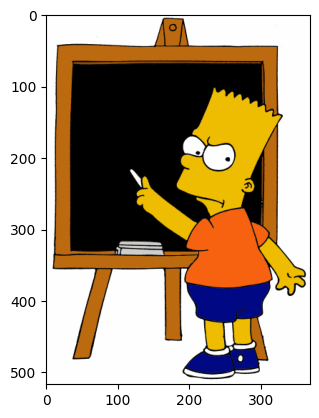

In [20]:
# plot the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [21]:
# now we can try to view an image of Homer
image = cv2.imread(os.path.join('data', 'homer', 'homer99.bmp'))

In [22]:
# this image is 742 x 509 with 3 channels so it is a colored image
image.shape

(742, 509, 3)

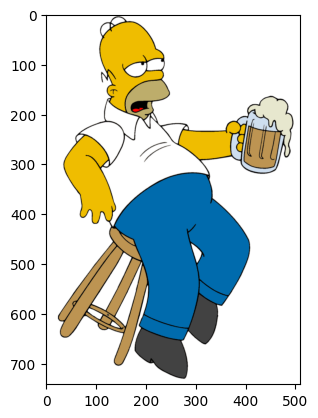

In [23]:
# view image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

Our images seem to be working so we can move forward with our convolutional neural network. One thing to notice is that the image of bart is 298x250x3 whereas the image of Homer is 742x509x3. The 3 indicates the channels and means that these are colored photos. The other measurements show us that these images are not the same size, so we will have to do some preprocessing to ensure that they are resized. When using cv2 to read images and matplotlib to plot the images the color will be distorded because cv2 uses the BGR format and matplotlib uses the RGB format. This is not something that should hinder the performance of our model so we only need to worry about it if we want to use matplot lib to plot the image with the correct colors. 

## 2. Creating Dataset

We will be using the keras utility dataset API to create our data set for us. This will identify the **images** and **labels** for us so that we do not have to do it ourselves. It will also **resize** all our images to be the same shape which we have already seen that the Homer and Bart images will be different shapes to start. When the data set is created for us we can see that it has established 196 images that belong to 2 classes which is exactly what we want to see because we have 118 images of Bart and 78 images of Homer for a total of 196 images belonging to one of the two classes which are Bart and Homer. The default settings will have a batch size of 32 so each batch will consist of 32 images and it will resize all images to be 256x256 for us. Shuffle is set to true and validation_split is set to none and these can be changed in we would like.

In [24]:
# use keras utils to create a data set for us from our data folder
data = tf.keras.utils.image_dataset_from_directory('data')

Found 269 files belonging to 2 classes.


In [25]:
# check details
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



The data was created for us but we are not able to access this variable as it currently stands. We will need to make an iterator that that we can access the batches of data. 

In [26]:
# view data
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [27]:
# fetch data from our generated data
data_fetch = data.as_numpy_iterator()

In [28]:
# grab a batch of data
batch = data_fetch.next()

The array will consist of pixel instensity for each color channel as a byte from 0 to 255 since it was reshaped to 256x256. This is the first part of the convolutional neural network that is different than a classic ann model since the images get represented as pixels. 

In [29]:
# this is our tuple of 32 images with the labels listed at the bottom
batch

(array([[[[254.     , 254.     , 254.     ],
          [254.     , 254.     , 254.     ],
          [254.     , 254.     , 254.     ],
          ...,
          [254.     , 254.     , 254.     ],
          [254.     , 254.     , 254.     ],
          [254.     , 254.     , 254.     ]],
 
         [[254.     , 254.     , 254.     ],
          [254.     , 254.     , 254.     ],
          [254.     , 254.     , 254.     ],
          ...,
          [254.     , 254.     , 254.     ],
          [254.     , 254.     , 254.     ],
          [254.     , 254.     , 254.     ]],
 
         [[254.     , 254.     , 254.     ],
          [254.     , 254.     , 254.     ],
          [254.     , 254.     , 254.     ],
          ...,
          [254.     , 254.     , 254.     ],
          [254.     , 254.     , 254.     ],
          [254.     , 254.     , 254.     ]],
 
         ...,
 
         [[254.     , 254.     , 254.     ],
          [254.     , 254.     , 254.     ],
          [254.     , 254.    

After making the data pipeline accessible by making an iterator, we can grab a batch of data. Remember, the data will be broken down into batches of 32 images and reshaped to be 256x256 so we should see this in our batch shape. When we view our size we will see 4 numbers. In TensorFlow each input image is represented as a 4D tensor and the numbers correspond to the **batch size, height, width, and channels**. These images are loaded in as tuples so each x corresponds to a y. The labels, or classes, of the images will be the y portion of the tuple which we can access by using **batch[1]** which will show us the 32 class labels for the images. We are going to keep the batch size set to 32 and we will lower it if we have an out-of-memory error. If this crash does occur, we will also try to reduce the dimensionality using a stride or reduce the amount of layers. For now, we will see if it works.

In [30]:
# view the shape
batch[0].shape

(32, 256, 256, 3)

In [31]:
# view the 32 image classes
batch[1]

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0])

Now that our data has been created we can plot the four first images of our batch. Here we see there are 3 corresponding to Bart as class 0 and one corresponding to Homer as class 1. Since the default setting for shuffle batches is set to True, everytime we grab a batch it will be different images.

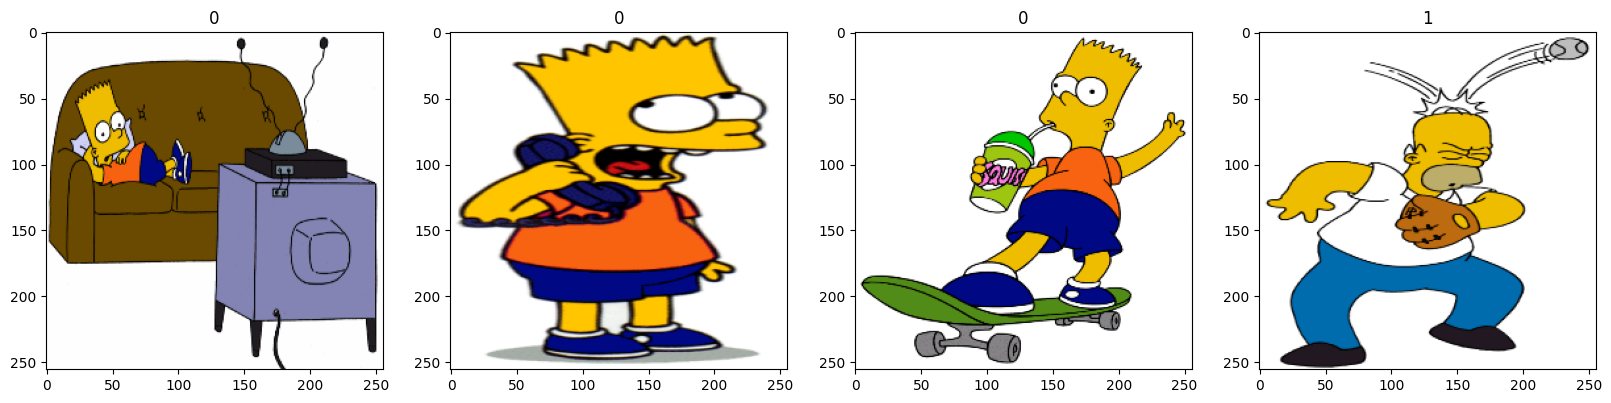

In [32]:
# plot 4 images with their class as the title 
fig, axes = plt.subplots(ncols=4, figsize=(20,20))
# loop through 4 images and plot them
for index, img in enumerate(batch[0][:4]):
    axes[index].imshow(img.astype(int))
    axes[index].title.set_text(batch[1][index])

Our next step is to preprocess the data. As we saw in our numpy array the pixel instensity for each color ranges from 0 to 255 but to make computations faster, we will scale the data between 0 and 1 by dividing the pixels by 255. Since we are using the keras utility to generate our dataset and then grab batches from it we would like these to be scaled before we grab the data so we can use our data pipeline to do so. Tis is done using the **map** function to transform our data. This is sort of comparable to the sklearn ColumnTransformer when using pipelines because it will scale the data for us inside of the pipeline. When we access our data there will be two parts. X is the image as a numpy array and y is the target variable. This lambda function will divide the values in the numpy array by the max (255) which will make every value between 0-1 and leave y as is. The map function can be found here: https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map

After the data is scaled we will create a validation set using the **take** and **skip** functions. The **take** function will take data that we want and the **skip** function will skip data that we do not want to use. This ensures we will not have the same data in our training and validation sets which will falsely increase our accuracy.

In [33]:
# scale the data by dividing x by the max and leaving y untouched
scaled_data = data.map(lambda x, y: (x / 255, y))

In [34]:
# access the data
scaled_fetch = scaled_data.as_numpy_iterator()

In [35]:
# grab a shuffled batch
batch = scaled_fetch.next()

In [36]:
# make sure they are now scaled
batch[0].max()

1.0

We are going to have 7 batches of 32 images (if it is divisible by 32, if not one may be a little less). The validation set will be used to evaluate our model while it is training and will be used to fine tune our model. We would like to split our data so that each batch is covered. I would like to train on 6 batches and evaluate on 1 batch of data so we will set the **training** size equal to **90%** and the **validation** size equal to **10%** and add one so that it is one batch. This means our **training data** will have 32 images * 6 batches, or 192 images. This means we should train on 5 batches and test on 2 batches.

In [37]:
# how many batches are in our data
len(scaled_data)

9

In [38]:
# set training and validation sizes
train_size = int(len(scaled_data) *.7)
val_size = int(len(scaled_data) * .2) + 1    # add one batch to cover all batches
test_size = int(len(scaled_data) * .2)

In [39]:
# view batch sizes
print(f'Our training size will cover {train_size} batches.')
print(f'Our validation size will cover {val_size} batches.')
print(f'Our validation size will cover {test_size} batches.')

Our training size will cover 6 batches.
Our validation size will cover 2 batches.
Our validation size will cover 1 batches.


In [40]:
# create train and val data
train = scaled_data.take(train_size)
val = scaled_data.skip(train_size).take(val_size)
test = scaled_data.skip(train_size + test_size).take(test_size)

In [41]:
len(train)

6

In [42]:
for images, labels in scaled_data.take(train_size):
    print(labels)

tf.Tensor([1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1], shape=(32,), dtype=int32)
tf.Tensor([1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1], shape=(32,), dtype=int32)
tf.Tensor([1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0], shape=(32,), dtype=int32)
tf.Tensor([1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 1], shape=(32,), dtype=int32)
tf.Tensor([0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0], shape=(32,), dtype=int32)
tf.Tensor([1 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0], shape=(32,), dtype=int32)


In [43]:
for images, labels in scaled_data.take(train_size):
    print(labels)
    
for images, labels in scaled_data.skip(train_size).take(val_size):
    print(labels)

tf.Tensor([1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1], shape=(32,), dtype=int32)
tf.Tensor([1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1], shape=(32,), dtype=int32)
tf.Tensor([0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1], shape=(32,), dtype=int32)
tf.Tensor([0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0], shape=(32,), dtype=int32)
tf.Tensor([1 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1], shape=(32,), dtype=int32)
tf.Tensor([1 0 1 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 1], shape=(32,), dtype=int32)
tf.Tensor([1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1], shape=(32,), dtype=int32)
tf.Tensor([0 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0], shape=(32,), dtype=int32)


In [44]:
for images, labels in scaled_data.skip(train_size + val_size).take(test_size):
    print(labels)

tf.Tensor([1 0 1 0 0 1 1 0 0 0 0 1 1], shape=(13,), dtype=int32)


#### Potential Warning
When we use take(train_size) we are correctly getting 5 batches, but the batches are changing each time. This means that when we use the skip function we may still be getting the same images in the validation partition and we do not want that. To test this out we will graph our results and look for overfitting after we have trained and fit our model. We can also see that the last batch is only 4 images in length which is why we chose to take two batches for the validation set.

### Building the Model

To build our model we have to import some libraries to assist us. We are importing **Sequential** because we are going to be creating a model with 1 input and 1 output. We are also importing **Conv2D** which will create convolutional layers. Then we specify how many **filters** we want and the size of the filters. The filters are used to create the convolutional layer. It is most common to use 3x3 so that is what I am using in this case. The filter will only be connected to the pixels within the filter space. This will allow the network to focus on small features in the layer and progress to larger features in the next hidden layers. This filter will be slid across the entire image and compute a dot product. The results will have a bias term added to them and create a feature map. The fact that this filter is placed over a small area helps to identify correlations within the image. The filter map will then be ran through the ReLu activation function where negative values will become zero and positive values will remain unchanged. We will also be using **MaxPooling2D** as our technique for subsampling the image. This will condense the image and make computations easier which saves memory. It will also reduce the number of parameters which helps overfitting problems. **MaxPooling2d** has a default 2x2 size so our image will be half the size. The max pooling technique can also help keep outputs the same when images are shifted a few pixels to the right or left. Some of the disadvantages with MaxPooling2D with a 2x2 size is that it will only keep 1 of the four pixel values. This means 75% of the data is dropped. Also, in some cases we may want the results to change when a picture has been moved or shifted such as image segmentation. For these tasks we would not like the results to stay the same when the image is moved, but in our case, this becomes an advantage since we would still like the image to be Bart, or Homer. For image classification tasks, MaxPooling2D is generally a good strategy to use. I chose to use MaxPooling2D over AvgPool2D because I would like only the strongest pixels to be kept. We will also use **flatten** so that we can create a **dense**, fully connected output layer. 

In [45]:
# import libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [46]:
# create sequential shell
model = Sequential()

In [47]:
# add layers - input shape is 256x256x3 channels - remember it was reshaped for us

# imput layer with convolution of 16 filters that scans the image 3 pixels by 3 pixels in size
# stride is 1 pixel, pooling technique is max pooling
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

# number of filters, size of filter, stride, activation function, max pooling
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# number of filters, size of filter, stride, activation function, max pooling
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# number of filters, size of filter, stride, activation function, max pooling
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# condense down to a single value
model.add(Flatten())

# fully connected layer with 256 neurons
model.add(Dense(256, activation='relu'))

# output layer using sigmoid so it is between 0 and 1
model.add(Dense(1, activation='sigmoid'))

In [48]:
# compile the model
model.compile(optimizer = 'adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy']) 

In [49]:
# fit our model - this is how the model gets trained
hist = model.fit(train, epochs = 85, validation_data = val)

Epoch 1/85
6/6 [==============================] - 9s 1s/step - loss: 0.7071 - accuracy: 0.5521 - val_loss: 0.6763 - val_accuracy: 0.7656
Epoch 2/85
6/6 [==============================] - 6s 1s/step - loss: 0.6901 - accuracy: 0.6042 - val_loss: 0.6368 - val_accuracy: 0.6094
Epoch 3/85
6/6 [==============================] - 6s 1s/step - loss: 0.6358 - accuracy: 0.6198 - val_loss: 0.5758 - val_accuracy: 0.6875
Epoch 4/85
6/6 [==============================] - 6s 1s/step - loss: 0.5573 - accuracy: 0.6927 - val_loss: 0.5020 - val_accuracy: 0.8125
Epoch 5/85
6/6 [==============================] - 7s 1s/step - loss: 0.4855 - accuracy: 0.7500 - val_loss: 0.4046 - val_accuracy: 0.8281
Epoch 6/85
6/6 [==============================] - 7s 1s/step - loss: 0.4166 - accuracy: 0.7865 - val_loss: 0.3208 - val_accuracy: 0.8906
Epoch 7/85
6/6 [==============================] - 7s 1s/step - loss: 0.3926 - accuracy: 0.8333 - val_loss: 0.6882 - val_accuracy: 0.6719
Epoch 8/85
6/6 [=========================

## Validation Performance

When plotting the training and validation losses we are looking for them to follow eachother down. If the training loss gets lower through each epoch but the validation loss does not, this is an indication of potential overfitting. If this is the case, we should apply some regularization methods or even change our data. If neither are reducing their loss then we would have to try to make a deeper/more sophisticated neural network. This can indicate a bias problem. Based on the graph our model is performing extremely well.

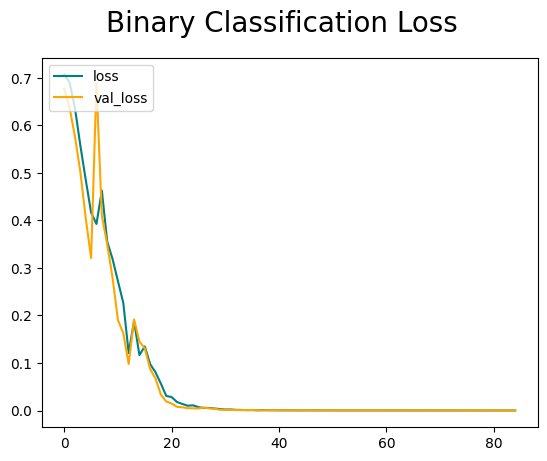

In [50]:
# plot the training and testing loss
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Binary Classification Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

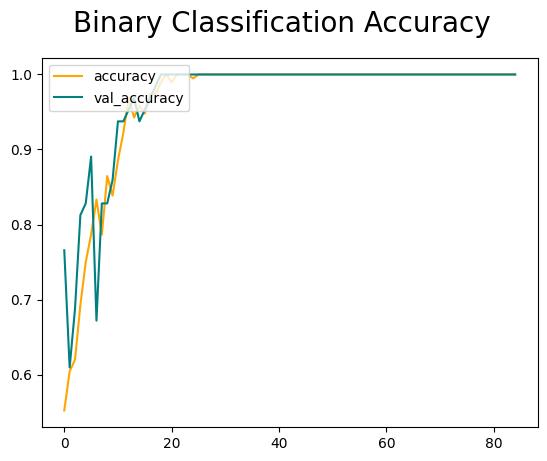

In [51]:
# view the accuracy metrics
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='orange', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='teal', label='val_accuracy')
fig.suptitle('Binary Classification Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Performance on Testing Set

Now we can import our testing data set to see how we perform. We did extremely well with the validation set so we are hoping to see similar results. As we can see from below we obtained a 100% accuracy on our testing data. This is great news for us so let's try to see if we can use a more difficult data set.

In [52]:
# import binary accuracy
from tensorflow.keras.metrics import BinaryAccuracy

In [53]:
# view accuracy
accuracy = BinaryAccuracy()

In [54]:
# create a loop that will go through each batch and make predictions
for batch in test.as_numpy_iterator():
    
    # features and labels from test data
    X, y = batch
    
    # yhat is predictions using features (images) from scaled test batches
    yhat = model.predict(X)
    
    # accuracy of actual, predicted
    accuracy.update_state(y, yhat)
    

1/1 [==============================] - 1s 520ms/step


In [55]:
# accuracy of actual, predicted
accuracy.update_state(y, yhat)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=64.0>

In [56]:
# print results
print(f'The accuracy on our testing data is {accuracy.result()}.')

The accuracy on our testing data is 1.0.


In [57]:
len(yhat)

32

In [58]:
len(y)

32

In [59]:
# actual classes
y

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0])

In [60]:
# predicted classes
actual = list(y)

In [61]:
# create predictions list
predicted = []
for num in yhat:
    if num > 0.5:
        num = 1
    else:
        num = 0
    predicted.append(num)

In [62]:
if actual == predicted:
    print('All of our predictions are correct.')
else:
    print('The predictions and actual values are not the same.')

All of our predictions are correct.


In [63]:
# can also evaluate this way
score = model.evaluate(X, y)

1/1 [==============================] - 0s 304ms/step - loss: 6.0887e-05 - accuracy: 1.0000


### Additional Goal for Different Dataset

Now we have the shell of a functioning CNN for a binary classification problem. Our goal was to see if we can make a CNN that will be able to work on a variety of datasets if we have an image classification problem. Now, we will try to use this model to classify jellyfish images based on their species. The only changes we should have to make is the sigmoid activation function in our output layer, and our loss function in our **compile** code. 

This data set contains roughly **900** images that belong to **6 classes** that represent different jellyfish species. After going through the code I noticed that the change will not be as easy as I originally thought, but the code has been condensed to much fewer lines after going through the first dataset, even though the output was much different. In this data set I have used the **validation_split** parameter to create a validation set for me. Although this was not as simple as I thought by just changing the ouput layers activation function, we only needed some small tweaks so we know that our overall architecture and preprocessing can work for various tasks in image classification.

## Loading the Data as Training and Validation

In [73]:
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

In [74]:
# load the data into a data set pipeline
jelly_training = tf.keras.utils.image_dataset_from_directory('jellyfish',
                                                             validation_split = 0.2, subset = 'training', seed = 123)

Found 900 files belonging to 6 classes.
Using 720 files for training.


In [75]:
# get a validation set
jelly_validation = tf.keras.utils.image_dataset_from_directory('jellyfish', 
                                                               validation_split = 0.2, subset = 'validation', seed = 123)

Found 900 files belonging to 6 classes.
Using 180 files for validation.


We can see that our data has been split into training and validation sets. We get the correct number of classes which is 6. We can view these class names using **.class_names**

In [76]:
# get class names
class_names = jelly_training.class_names
print(class_names)

['Moon_jellyfish', 'barrel_jellyfish', 'blue_jellyfish', 'compass_jellyfish', 'lions_mane_jellyfish', 'mauve_stinger_jellyfish']


In [77]:
AUTOTUNE = tf.data.AUTOTUNE

jelly_training = jelly_training.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
jelly_validation = jelly_validation.cache().prefetch(buffer_size=AUTOTUNE)

In [78]:
# scale the data
jelly_train_scaled = jelly_training.map(lambda x, y: (x / 255, y))
jelly_val_scaled = jelly_validation.map(lambda x, y: (x / 255, y))

In [79]:
# access data
jelly_fetch = jelly_train_scaled.as_numpy_iterator()

In [80]:
# grab 
batch = jelly_fetch.next()

In [81]:
# view classes
batch[1]

array([4, 1, 0, 5, 2, 4, 1, 5, 4, 3, 5, 1, 2, 1, 0, 4, 0, 2, 5, 5, 0, 2,
       2, 4, 0, 2, 5, 4, 1, 3, 1, 0])

In [82]:
# ensure they have been resized
batch[0].max()

1.0

In [83]:
# how many batches are in our data
len(jelly_train_scaled)

23

In [84]:
jelly_val_fetch = jelly_val_scaled.as_numpy_iterator()

In [85]:
batch = jelly_val_fetch.next()

In [86]:
batch[0].max()

1.0

In [87]:
# create sequential shell
model = Sequential()

In [88]:
num_classes = len(class_names)

In [89]:
num_classes

6

In [90]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",
                      input_shape=(255,255,
                                  3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
  ]
)

In [91]:
# add layers - make activation change

# imput layer with convolution of 16 filters that scans the image 3 pixels by 3 pixels in size
# stride is 1 pixel, pooling technique is max pooling
# first add data augmentation for overfitting 
model.add(RandomFlip("horizontal", input_shape=(256, 256,3)))
model.add(RandomRotation(0.1))
model.add(RandomZoom(0.1))
model.add(Conv2D(16, 3, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

# number of filters, size of filter, stride, activation function, max pooling
model.add(Conv2D(32, 3, activation='relu'))
model.add(MaxPooling2D())

# number of filters, size of filter, stride, activation function, max pooling
model.add(Conv2D(32, 3, activation='relu'))
model.add(MaxPooling2D())

# number of filters, size of filter, stride, activation function, max pooling
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D())

# dropout
model.add(Dropout(0.5))

# condense down to a single value
model.add(Flatten())

# fully connected layer with 256 neurons
model.add(Dense(256, activation='relu'))


#dense layer
model.add(Dense(128, activation='relu'))


# output layer using softmax
model.add(Dense(num_classes, activation='softmax'))

In [92]:
# compile the model - make losses change
model.compile(optimizer = 'adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy']) 

In [93]:
# fit our model
# fit our model - this is how the model gets trained
hist = model.fit(jelly_training, epochs = 85, validation_data = jelly_validation)

Epoch 1/85
23/23 [==============================] - 31s 1s/step - loss: 15.7665 - accuracy: 0.2486 - val_loss: 1.5681 - val_accuracy: 0.3333
Epoch 2/85
23/23 [==============================] - 27s 1s/step - loss: 1.4838 - accuracy: 0.4028 - val_loss: 1.6148 - val_accuracy: 0.3444
Epoch 3/85
23/23 [==============================] - 28s 1s/step - loss: 1.3296 - accuracy: 0.4778 - val_loss: 1.3360 - val_accuracy: 0.4556
Epoch 4/85
23/23 [==============================] - 28s 1s/step - loss: 1.2685 - accuracy: 0.5236 - val_loss: 1.2573 - val_accuracy: 0.4889
Epoch 5/85
23/23 [==============================] - 28s 1s/step - loss: 1.2299 - accuracy: 0.5333 - val_loss: 1.1920 - val_accuracy: 0.5333
Epoch 6/85
23/23 [==============================] - 28s 1s/step - loss: 1.1696 - accuracy: 0.5556 - val_loss: 1.2112 - val_accuracy: 0.5556
Epoch 7/85
23/23 [==============================] - 28s 1s/step - loss: 1.1656 - accuracy: 0.5639 - val_loss: 1.2018 - val_accuracy: 0.5167
Epoch 8/85
23/23 [=

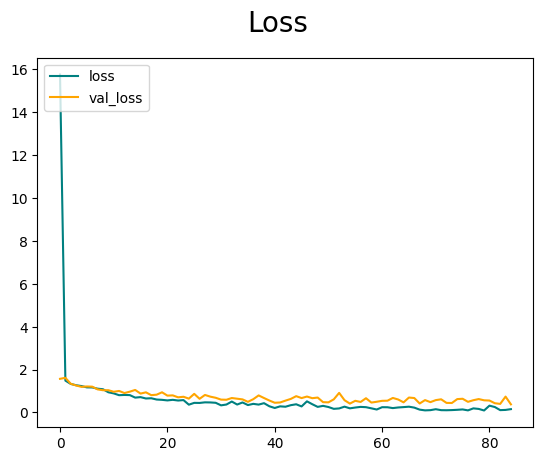

In [94]:
# plot the training and testing loss
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

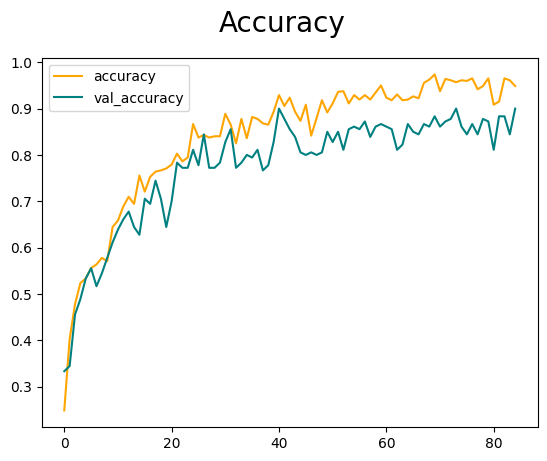

In [95]:
# view the accuracy metrics
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='orange', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='teal', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Evaluate on Test Data

To test our model we are given some images that were not included in our training and validation sets. We can load an image in and use **.predict()** to see if we get the correct species. Since we are using a **softmax** activation function in our output layer we will get 6 outputs that will correspond to the probability of each class. Our first test will be on an image of a moon jellyfish. Let's see if we can correctly classify the image.

In [96]:
class_names

['Moon_jellyfish',
 'barrel_jellyfish',
 'blue_jellyfish',
 'compass_jellyfish',
 'lions_mane_jellyfish',
 'mauve_stinger_jellyfish']

In [97]:
# now we can try to view an image of an unseen jellyfish
image = cv2.imread(os.path.join('jellyfish', '33_test.jpeg'))

In [98]:
image.shape

(224, 224, 3)

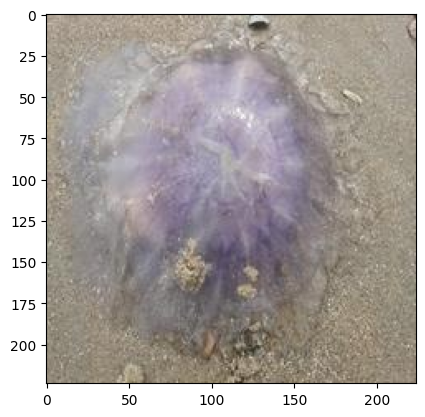

In [99]:
# view image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [100]:
# resize the image for our CNN
resized = tf.image.resize(img, (256, 256))

In [101]:
yhat = model.predict(np.expand_dims(resized / 255, 0))

1/1 [==============================] - 0s 215ms/step


In [102]:
yhat

array([[0.12752251, 0.18578085, 0.24677108, 0.12469731, 0.10222119,
        0.21300699]], dtype=float32)

In [103]:
print(f'This image is being classified as a {class_names[np.argmax(yhat)]}.')

This image is being classified as a blue_jellyfish.


In [104]:
# try a moon jellyfish
# now we can try to view an image of an unseen moon jellyfish
image2 = cv2.imread(os.path.join('jellyfish', '48_test.jpg'))

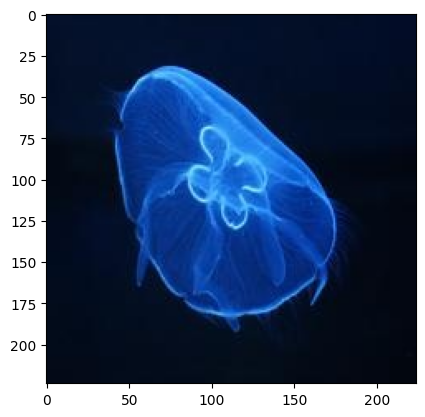

In [105]:
# view image
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))

In [106]:
# resize the image for our CNN
resized2 = tf.image.resize(image2, (256, 256))

In [107]:
yhat2 = model.predict(np.expand_dims(resized2 / 255, 0))

1/1 [==============================] - 0s 63ms/step


In [108]:
yhat2

array([[0.18216208, 0.07004383, 0.51041496, 0.05992558, 0.07337367,
        0.10407984]], dtype=float32)

In [109]:
print(f'This image is being classified as a {class_names[np.argmax(yhat2)]}.')

This image is being classified as a blue_jellyfish.


In [110]:
# try a compass jellyfish
image3 = cv2.imread(os.path.join('jellyfish', '54_test.jpg'))

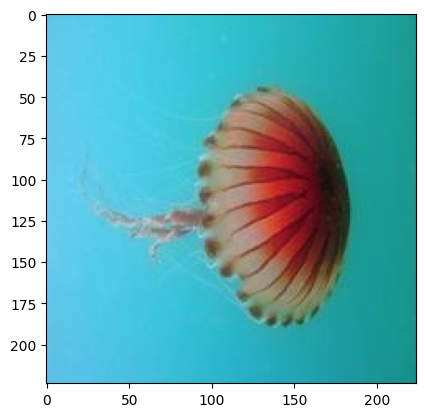

In [111]:
# view image
plt.imshow(cv2.cvtColor(image3, cv2.COLOR_BGR2RGB))

In [112]:
# resize the image for our CNN
resized3 = tf.image.resize(image3, (256, 256))

In [113]:
yhat3 = model.predict(np.expand_dims(resized3 / 255, 0))

1/1 [==============================] - 0s 68ms/step


In [114]:
yhat3

array([[0.09703465, 0.20326367, 0.30880246, 0.09771791, 0.12550066,
        0.16768071]], dtype=float32)

In [115]:
print(f'This image is being classified as a {class_names[np.argmax(yhat3)]}.')

This image is being classified as a blue_jellyfish.


### Using "categorical_crossentropy"

In [133]:
# load the data into a data set pipeline
jelly_training = tf.keras.utils.image_dataset_from_directory('jellyfish', label_mode='categorical',
                                                             validation_split = 0.2, subset = 'training', seed = 123)

Found 900 files belonging to 6 classes.
Using 720 files for training.


In [134]:
jelly_validation = tf.keras.utils.image_dataset_from_directory('jellyfish', label_mode = 'categorical',
                                                               validation_split = 0.2, subset = 'validation', seed = 123)

Found 900 files belonging to 6 classes.
Using 180 files for validation.


In [135]:
AUTOTUNE = tf.data.AUTOTUNE

jelly_training = jelly_training.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
jelly_validation = jelly_validation.cache().prefetch(buffer_size=AUTOTUNE)

In [136]:
# scale the data
jelly_train_scaled = jelly_training.map(lambda x, y: (x / 255, y))
jelly_val_scaled = jelly_validation.map(lambda x, y: (x / 255, y))

In [137]:
# access data
jelly_train_fetch = jelly_train_scaled.as_numpy_iterator()

In [138]:
# grab 
batch = jelly_train_fetch.next()

In [139]:
batch[1]

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0.

In [140]:
batch[0].max()

1.0

In [141]:
# create sequential shell
model = Sequential()

In [142]:
# add layers - make activation change

# imput layer with convolution of 16 filters that scans the image 3 pixels by 3 pixels in size
# stride is 1 pixel, pooling technique is max pooling
# first add data augmentation for overfitting 
model.add(RandomFlip("horizontal", input_shape=(256, 256,3)))
model.add(RandomRotation(0.1))
model.add(RandomZoom(0.1))
model.add(Conv2D(16, 3, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

# number of filters, size of filter, stride, activation function, max pooling
model.add(Conv2D(32, 3, activation='relu'))
model.add(MaxPooling2D())

# number of filters, size of filter, stride, activation function, max pooling
model.add(Conv2D(32, 3, activation='relu'))
model.add(MaxPooling2D())

# number of filters, size of filter, stride, activation function, max pooling
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D())

# dropout
model.add(Dropout(0.5))

# condense down to a single value
model.add(Flatten())

# fully connected layer with 256 neurons
model.add(Dense(256, activation='relu'))


#dense layer
model.add(Dense(128, activation='relu'))


# output layer using softmax
model.add(Dense(num_classes, activation='softmax'))

In [143]:
# compile the model - make losses change
model.compile(optimizer = 'adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics = ['accuracy']) 

In [144]:
# fit our model - this is how the model gets trained
hist = model.fit(jelly_train_scaled, epochs = 55, validation_data = jelly_val_scaled)

Epoch 1/55
23/23 [==============================] - 19s 711ms/step - loss: 1.6851 - accuracy: 0.2722 - val_loss: 1.6698 - val_accuracy: 0.3000
Epoch 2/55
23/23 [==============================] - 15s 632ms/step - loss: 1.4380 - accuracy: 0.3847 - val_loss: 1.4041 - val_accuracy: 0.5000
Epoch 3/55
23/23 [==============================] - 15s 658ms/step - loss: 1.3148 - accuracy: 0.4736 - val_loss: 1.5475 - val_accuracy: 0.3944
Epoch 4/55
23/23 [==============================] - 16s 707ms/step - loss: 1.2972 - accuracy: 0.5083 - val_loss: 1.3624 - val_accuracy: 0.4389
Epoch 5/55
23/23 [==============================] - 16s 715ms/step - loss: 1.1463 - accuracy: 0.5403 - val_loss: 1.1227 - val_accuracy: 0.4944
Epoch 6/55
23/23 [==============================] - 16s 702ms/step - loss: 1.0554 - accuracy: 0.5681 - val_loss: 1.2888 - val_accuracy: 0.4222
Epoch 7/55
23/23 [==============================] - 16s 711ms/step - loss: 0.9416 - accuracy: 0.6361 - val_loss: 1.0929 - val_accuracy: 0.5667

From our results we see that our model validation loss and accuracy are following the trend from the training data which means our model is not over fitting. We are achieving almost **90%** accuracy and the accuracy was going up on the last few epochs so we may have better results from longer training periods.

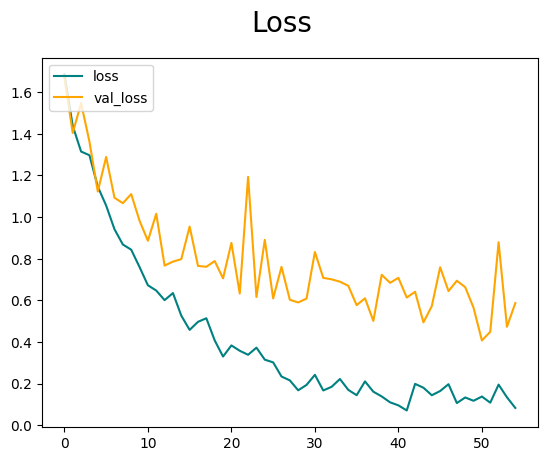

In [145]:
# plot the training and testing loss
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

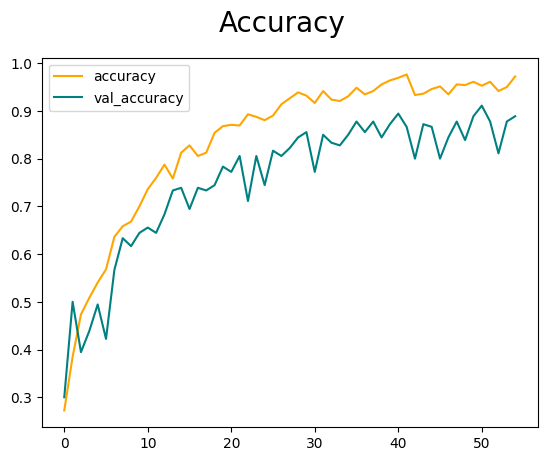

In [146]:
# view the accuracy metrics
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='orange', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='teal', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [165]:
# try a moon jellyfish
# now we can try to view an image of an unseen moon jellyfish
image2 = cv2.imread(os.path.join('jellyfish', '48_test.jpg'))

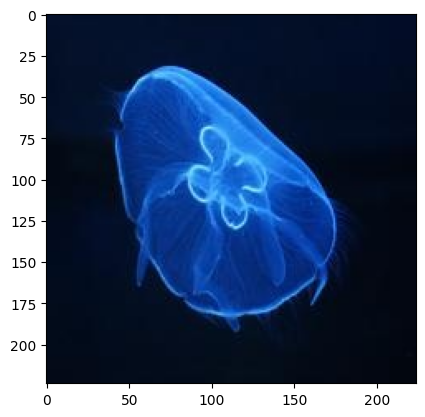

In [166]:
# view image
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))

In [167]:
# resize the image for our CNN
resized2 = tf.image.resize(image2, (256, 256))

In [168]:
yhat = model.predict(np.expand_dims(resized2 / 255, 0))

1/1 [==============================] - 0s 33ms/step


In [169]:
print(f'This image is being classified as a {class_names[np.argmax(yhat)]}.')

This image is being classified as a lions_mane_jellyfish.


In [170]:
# try a compass jellyfish
image3 = cv2.imread(os.path.join('jellyfish', '54_test.jpg'))

In [171]:
# resize the image for our CNN
resized3 = tf.image.resize(image3, (256, 256))

In [172]:
yhat3 = model.predict(np.expand_dims(resized3 / 255, 0))

1/1 [==============================] - 0s 50ms/step


Since our compass jellyfish was incorrect we should try another compass jellyfish to make sure that our model is not having any issues with a specific class.

In [176]:
# now we can try to view an image of an unseen blue jellyfish
image = cv2.imread(os.path.join('jellyfish', '33_test.jpeg'))

In [177]:
# resize it
resized = tf.image.resize(image, (255, 255))

In [178]:
# make prediction
yhat = model.predict(np.expand_dims(resized / 255, 0))

1/1 [==============================] - 0s 83ms/step


In [179]:
# blue jellyfish is correct
print(f'This image is being classified as a {class_names[np.argmax(yhat3)]}.')

This image is being classified as a blue_jellyfish.


### Full Test Data

In [180]:
# load the data into a data set pipeline
jelly_test = tf.keras.utils.image_dataset_from_directory('jelly_test', label_mode='categorical')

Found 36 files belonging to 6 classes.


In [181]:
# scale the data
jelly_test_scaled = jelly_test.map(lambda x, y: (x / 255, y))

In [182]:
# access data
jelly_test_fetch = jelly_train_scaled.as_numpy_iterator()

In [183]:
model.evaluate(jelly_test_fetch)

23/23 [==============================] - 5s 218ms/step - loss: 0.0439 - accuracy: 0.9917


[0.04391368851065636, 0.9916666746139526]

From our results, we are seeing that we only have a 99% accuracy, however we only got 1 correct out of three independent tests. This is unexpected since we have an accuracy of **90%** on our validation set so I am not sure why this is the case. I have done many different variations of this model and added a dense layer, and data augmentation and I am not understanding why my validation accuracy can be so much better than my test accuracy. Please help me correct this if you find any mistakes. Thank you. 

### References

Géron, A. (2019). *Hands-On Machine Learning with Scikit-Learn, Keras and TensorFlow.* Kiwisoft S.A.S.

TensorFlow. (2023). *Image Classification*. https://www.tensorflow.org/tutorials/images/classification